# Support Vector Machine

## Introduction and Formulation

A Support Vector Machine (SVM) is a **supervised** learning model for **Classification and Regression** analysis. SVM maps training examples to points in space so as to maximize the width of the gap between the two categories. 

<figure>
    <center><img src="img/SVM.png" width="300" height="300">
    <figcaption>Fig: Linear SVM</figcaption></center>
</figure>

Let $\{x_i\}_{i=1}^n$ the training set with classes $\{ -1 , 1\}$. The separation hyperplane is defined by 
$$ \{ x \in \mathbb{R^n} | w^{\top}x + b = 0 \} $$

So that if $w^{\top}x + b > 0$ then $x$ belongs to the class 1 and if $w^{\top}x + b < 0$ then $x$ belongs to the class -1. 

$w \in \mathbb{R}^n$ is the perpendicular vector to the hyperplane and $b \in \mathbb{R}$ the *offset*. When the data is linearly separable, there are infinite separation hyperplanes, so we want to impose the class membership constraint on the support vectors $x_{+} , x_{-}$
$$
\begin{equation}
\begin{split}
w^{\top}x_{+} + b = 1 \\
w^{\top}x_{-} + b = -1
\end{split}
\end{equation} $$

The width of the gap $m$ using the restriction above can be calculated by 
$$
m = \frac{1}{2}||proy_w(x_{+} - x_{-})|| = \frac{1}{2}||x_{+} - x_{-}||\cos(\theta)
$$
Using that $cos(\theta) = \frac{\langle x,y \rangle}{||x|| \cdot ||y||}$
$$
= \frac{1}{2}||x_{+} - x_{-}||\left ( \frac{w^{\top}(x_{+} - x_{-})}{||w|| \cdot ||x_{+} - x_{-}||} \right ) = \frac{1}{2||w||}w^{\top}(x_{+} - x_{-}) = \frac{1}{||w||}$$
As the support vectors are the closest points to the hyperplane that satisfy the constraint with equality, then the classification rule can be written as 

$$
\begin{equation*}
\begin{split}
y_i = +1 \leftrightarrow w^{\top}x_i + b \geq +1 \\
y_i = -1 \leftrightarrow w^{\top}x_i + b \leq -1
\end{split}
\end{equation*} $$

And the optimization problem is given by
$$
\begin{equation*}
\begin{aligned}
\max_{\omega , b} \quad \frac{1}{||w||} \\
\textrm{s.t.} \quad y_i(w^{\top}x_i + b ) \geq 1 , \forall i \in \{ 1 , \dots N \}
\end{aligned}
\end{equation*}
$$
equivalent to 
$$
\begin{equation*}
\begin{aligned}
\min_{\omega , b} \quad \frac{1}{2}||w||^2 \\
\textrm{s.t.} \quad y_i(w^{\top}x_i + b ) \geq 1 , \forall i \in \{ 1 , \dots N \}
\end{aligned}
\end{equation*}
$$
This optimization problem is often solved using the **dual problem** (quadratic programming) and is fundamental for the non-linear extension of the SVM. (Kernel Trick)

## Soft Margin

The data is often not linearly separable so we have to allow the missclassification of some points (**Soft Margin**). This is made by changing the optimization problem (adding regularization) to 
$$
\begin{equation*}
\begin{aligned}
\min_{\omega , b} \quad \frac{1}{2}||w||^2 + C \sum_{i=1}^N \xi_i  \\
\textrm{s.t.} \quad y_i(w^{\top}x_i + b ) \geq 1  - \xi_i, \forall i \in \{ 1 , \dots N \} \hspace{0.1cm} ,\hspace{0.1cm} \xi_i \geq 0
\end{aligned}
\end{equation*}
$$

## Kernel Trick

In the formulation of the dual problem, the objective function requires computing the dot products between all the data points on the training set. If we want to project our data to a higher dimension (apply a mapping $\phi$ and with that, make the separation possible), this can be done just computing the products $ \langle <\phi(x_i) , \phi(x_j)> \rangle $ for all $i$ and $j$. 

<figure>
    <center><img src="img/mapping.png" width="500" height="300">
    <figcaption>Fig: Mapping to a Higher Dimension</figcaption></center>
</figure>


The benefit of this is that we don't need to know the mapping $\phi$ as **Mercer Theorem** states that 
$$
K(x_i , x_j) = <\phi(x_i) , \phi(x_j)>
$$
where $K: X \times X \rightarrow \mathbb{R} $ is a Mercer Kernel in a Hilbert Space (possibly of infinite dimension) so we have to set $K$ in order to map the data to a higher dimension.

## Important Parameters

 - C: Is the regularization constant. Default = 1 
 - Kernel: The kernel used to compute the dot products. Default = "RBF" (Infinite Dimensional) , others: Poly (Finite), Sigmoid (Infinite), Linear (Finite)
 - Kernel parameters: Degree, Gamma/Scale, etc... 

## Relevant Information 
 - SVD are **sensitive to feature scaling**
 - Approx Complexity: $O(M \cdot N)$ linear case and $O(M^2 \cdot N)$ to $O(M^3 \cdot N)$ when using Kernel trick. $N$ number of attributes and $M$ the number of instances. 


## Implementation


We are going to work with the [Digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) Dataset


In [1]:
#Import usual libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

#Import usual functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score

#Import utils
from utils.plot import confusion_matrix_custom

#Import required libraries and functions
from sklearn.datasets import load_digits, load_iris
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
#Load the dataset 
digits = load_digits()
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df["target"] = digits.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
#Divide the data 
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["target"]), df["target"], test_size=0.333, stratify = df["target"], random_state=666)

#Create the Pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(random_state=666))])

#Fit the values
pipe.fit(X_train,y_train)
#Make a prediction
y_pred = pipe.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.98      0.98      0.98        61
           2       1.00      0.98      0.99        59
           3       1.00      0.95      0.97        61
           4       0.88      0.98      0.93        60
           5       0.95      1.00      0.98        61
           6       1.00      1.00      1.00        60
           7       1.00      1.00      1.00        60
           8       0.98      0.95      0.96        58
           9       0.98      0.93      0.96        60

    accuracy                           0.98       599
   macro avg       0.98      0.98      0.98       599
weighted avg       0.98      0.98      0.98       599



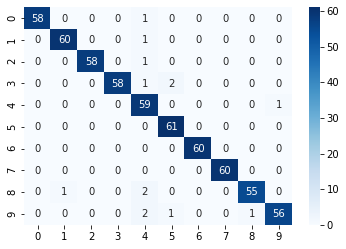

In [4]:
#Change of notation
y_real = y_test

#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred)

#Showing performance with metrics
print(classification_report(y_real , y_pred))

## Kernel Choice

In [5]:
# Number of points
n = 2000

# Means
mean_A = np.array([0, 0])

# Covariance matrix
std = np.eye(2)

# Create two dimensional points
X= np.random.multivariate_normal(mean_A, std, size =n)
y = np.zeros(n)

for i in range(n):
    if X[i][0]*X[i][1] >= 0:
        y[i]=1
    else:
        y[i]= 0

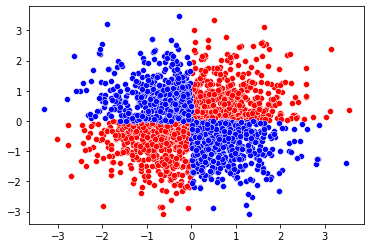

In [6]:
#Plotting
grupo1 = X[y==1]
grupo2 = X[y==0]

plt.scatter(grupo1[:,0], grupo1[:,1], c='red', edgecolor='w', linewidth=0.5)
plt.scatter(grupo2[:,0], grupo2[:,1], c='blue', edgecolor='w', linewidth=0.5)

In [34]:
#Fit the model with RBF and Poly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 666 , stratify=y)
#Create the Pipeline
pipe_poly = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel= "poly", degree=4 , random_state=666))])
pipe_sigmoid = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel= "sigmoid",random_state=666))])
pipe_rbf = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel= "rbf", random_state=666))])
#Fit the values
pipe_poly.fit(X_train,y_train)
pipe_sigmoid.fit(X_train,y_train)
pipe_rbf.fit(X_train,y_train)
#Make a prediction
y_pred_poly = pipe_poly.predict(X_test)
y_pred_sigmoid = pipe_sigmoid.predict(X_test)
y_pred_rbf = pipe_rbf.predict(X_test)


              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89       319
         1.0       0.84      1.00      0.91       341

    accuracy                           0.90       660
   macro avg       0.92      0.90      0.90       660
weighted avg       0.92      0.90      0.90       660



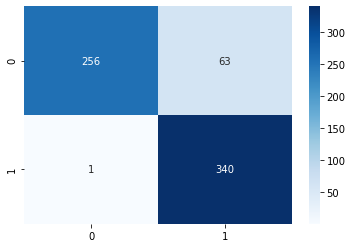

              precision    recall  f1-score   support

         0.0       0.46      0.43      0.44       319
         1.0       0.50      0.54      0.52       341

    accuracy                           0.48       660
   macro avg       0.48      0.48      0.48       660
weighted avg       0.48      0.48      0.48       660



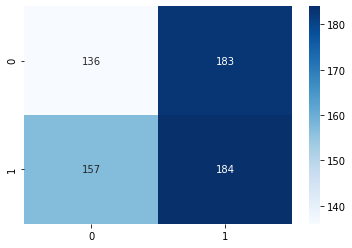

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       319
         1.0       0.94      0.99      0.97       341

    accuracy                           0.96       660
   macro avg       0.97      0.96      0.96       660
weighted avg       0.96      0.96      0.96       660



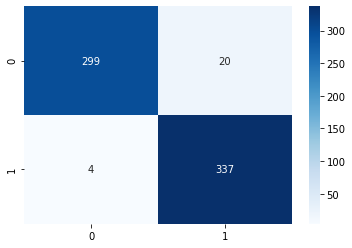

In [35]:
#Change of notation
y_real = y_test

#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred_poly)

#Showing performance with metrics
print(classification_report(y_real , y_pred_poly))
plt.show()

#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred_sigmoid)

#Showing performance with metrics
print(classification_report(y_real , y_pred_sigmoid))
plt.show()

#Showing performance with a confusion matrix
confusion_matrix_custom(y_real,y_pred_rbf)

#Showing performance with metrics
print(classification_report(y_real , y_pred_rbf))
plt.show()


RBF Kernel has more accuracy!!!

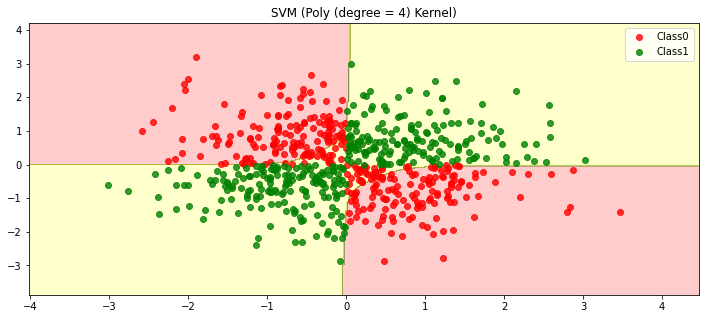

In [37]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.02))


plt.figure(figsize=(12, 5))
plt.contourf(X1, X2, pipe_poly.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colorlist = ['red', 'green']
for i in range(2):
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1],
                c=colorlist[i], label='Class' + str(i), alpha=0.8)
    
plt.title('SVM (Poly (degree = 4) Kernel)')
plt.legend()
plt.show()

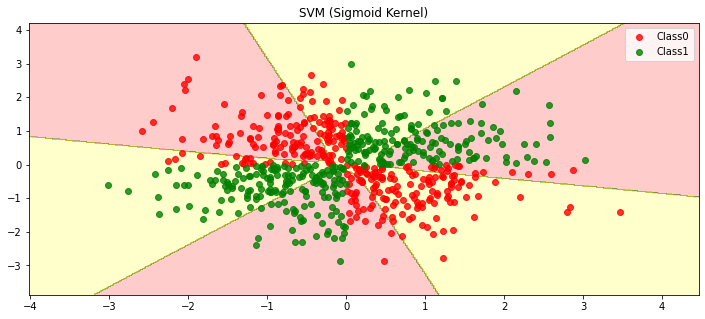

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.02))


plt.figure(figsize=(12, 5))
plt.contourf(X1, X2, pipe_sigmoid.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colorlist = ['red', 'green']
for i in range(2):
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1],
                c=colorlist[i], label='Class' + str(i), alpha=0.8)
    
plt.title('SVM (Sigmoid Kernel)')
plt.legend()
plt.show()

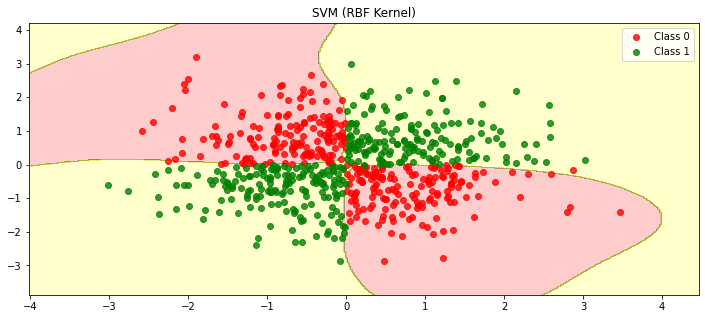

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.02),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.02))


plt.figure(figsize=(12, 5))
plt.contourf(X1, X2, pipe_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

colorlist = ['red', 'green']
for i in range(2):
    plt.scatter(X_set[y_set == i, 0], X_set[y_set == i, 1],
                c=colorlist[i], label='Class ' + str(i), alpha=0.8)
    
plt.title('SVM (RBF Kernel)')
plt.legend()
plt.show()